In [4]:
%time

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.9 µs


In [3]:
from fastai.vision.all import *

In [2]:
!pip install duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.3 MB/s eta 0:00:00


In [5]:
from duckduckgo_search import DDGS
from fastcore.all import *

In [11]:
def search_images(keyword,n_images):
  return L(DDGS().images(keyword, max_results = n_images)).itemgot('image')

In [12]:
url = search_images("baseball ball images",500)
url[0]


'http://pngimg.com/uploads/baseball/baseball_PNG19020.png'

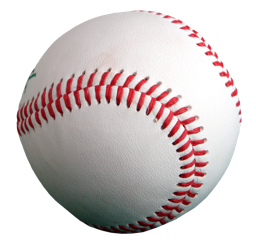

In [14]:
from fastdownload import download_url

dest = "baseball ball.jpg"
download_url(url[0],dest)

img = Image.open(dest)
img.to_thumb(256,256)

In [18]:
searches = "baseball ball images","cricket white ball images"
path = Path("baseball or not")

for n in searches:
  dest = (path/n)
  dest.mkdir(exist_ok=True,parents=True)
  download_images(dest,urls=search_images(f"{n} photo",1500))
  resize_images(path/n, max_size=400, dest=path/n)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF 

In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message

43

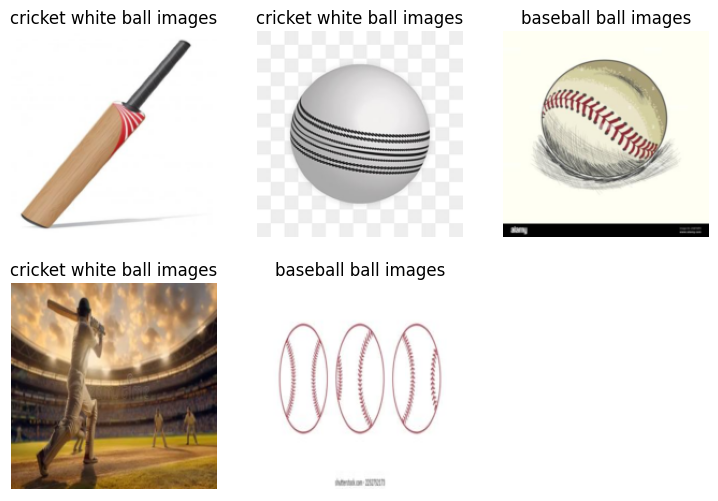

In [22]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.25),
    get_y = parent_label,
    item_tfms = [Resize(192, method ='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n = 5)

In [35]:
model = vision_learner(dls, resnet18, metrics = accuracy)

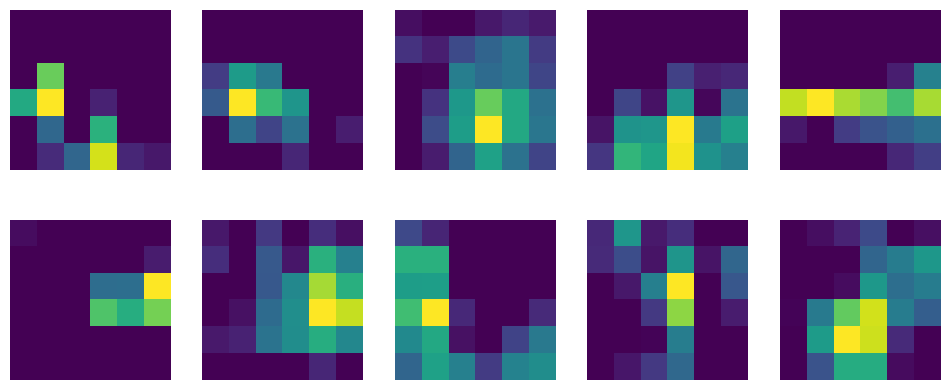

In [111]:
from fastai.vision.all import *

# Create a hook to capture outputs from a specific layer
def hook_fn(module, input, output):
    hook.outputs.append(output)

hook = hook_outputs([model.model[0][7]])  # For example, first conv layer in resnet18

# Pass a batch through model
xb,_ = dls.one_batch()
model.model.eval()
with torch.no_grad():
    preds = model.model(xb)

# hook.outputs now contains activations of that layer
acts = hook.stored[0]

# Visualize feature maps from this layer (show first 10 channels)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(acts[0,i].cpu(), cmap='viridis')
    ax.axis('off')
plt.show()

hook.remove()  # Remove hook when done


In [36]:
model.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.893687,0.541120,0.787879,01:29


epoch,train_loss,valid_loss,accuracy,time
0,0.376756,0.478282,0.818182,02:00
1,0.251391,0.360711,0.872727,02:05
2,0.179677,0.439749,0.878788,02:07
3,0.129110,0.354977,0.909091,02:04
4,0.106326,0.355004,0.903030,02:04


In [84]:
import json

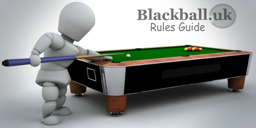

In [91]:
ur = search_images("blackball",1)
ur[0]

des = "baseball ball.jpg"
download_url(ur[0],des)

img = Image.open(des)
img.to_thumb(256,256)


In [92]:
baseball, _ , prob = model.predict(PILImage.create(des))
print(f"This is a: {baseball}.")
print(f"Probability it's a baseball: {prob[0].item()*100:.4f}%, probability it is cricket ball: {(1 - prob[0].item())*100:.4f}%")

This is a: baseball ball images.
Probability it's a baseball: 99.9340%, probability it is cricket ball: 0.0660%


In [45]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [47]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00


In [48]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU:', tpu.master())
except ValueError:
    print('No TPU found')


No TPU found
